## **Example of calculations of SNR for a range of the boson mass*

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import healpy
import h5py
import os

# Conditions

In [3]:
Tobs=3.15136e+7 #en s
z=4.222e9 #redshift in Pc

# Initial parameters

In [4]:
#Calculation of chi

In [5]:
G=6.6740e-11
c=299792458.0
p=5
t_rot=62e-6 #time or rotation for M=1msun
mass_BH=[10**5,10**6,10**7,10**8,10**9]
print(mass_BH)
chi=[]
chi2=[]

def rg(M):
    return (G*(M*2*10**30))/c**2
            
def J(M):
    return M*2*10**30*(2*np.pi*rg(M)**2)/(t_rot*M)

            
def a(M):
    return J(M)/(M*2*10**30*c)

for i in range(p):
    chi.append((a(mass_BH[i])*c**2)/(G*mass_BH[i]*2*10**30))
    #chi2.append((J(mass_BH[i]))/(mass_BH[i]*2*10**30*c*rg(mass_BH[i])))

print(chi)
print(len(mass_BH))
print(rg(mass_BH[1]))
print(mass_BH[0])

[100000, 1000000, 10000000, 100000000, 1000000000]
[0.5020445628910765, 0.5020445628910766, 0.5020445628910762, 0.5020445628910762, 0.5020445628910766]
5
1485165294.82037
100000


In [6]:
#d_source=np.linspace(z,10*z,p) #enPc
#d_source=[8e3,2e7] #enPc
d_source=np.linspace(z,5*z,p)
alpha_best_dfixed=[]
alpha_best_mfixed=[]
alpha_bestd_tot=[]
alpha_bestm_tot=[]

#print(len(alphas))
print(d_source)

[4.2220e+09 8.4440e+09 1.2666e+10 1.6888e+10 2.1110e+10]


# Search of best Boson 

In [7]:
def get_peak(a, lgw=2, **kwargs): 
    cloud = gwaxion.BosonCloud.from_parameters(1, 1, 0, alpha=a, evolve_params={'y_0': 1E-8}, **kwargs) 
    return cloud.gw(lgw).h0r, cloud.gw(lgw).f

In [8]:
import gwaxion
import multiprocessing
from functools import partial

alphas = np.arange(0.01, 0.25, 0.001)

for d in range (p):
    distance =  d_source[d]* gwaxion.PC_SI
    for b in range (p):
        bh = gwaxion.BlackHole(mass=mass_BH[b], chi=chi[b], msun=True)
        # collect peak values
        pool = multiprocessing.Pool(8)
        h0r_fs = pool.map(partial(get_peak, m_bh=bh.mass_msun, chi_bh=bh.chi), alphas)
        h0rs_num, fgws_num = np.array(h0r_fs).T
        
        # h0rs are the amplitudes 1m away from the source, so rescale by actual distance
        h0s_num = h0rs_num / distance
    
        best = max(zip(h0s_num, alphas))
        alpha_best_dfixed.append(best[1])
        #print(alpha_best_mfixed)

/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:268: RuntimeWarning: invalid value encountered in sqrt
  self.rm_natural = 1 - np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3

/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:268: RuntimeWarning: invalid value encountered in sqrt
  self.rm_natural = 1 - np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3

/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:268: RuntimeWarning: invalid value encountered in sqrt
  self.rm_natural = 1 - np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3

In [9]:
alpha_bestd_tot=[]
for i in range(p):
    alpha_bestd_tot.append([])

for i in range(p):
     alpha_bestd_tot[i]= alpha_best_dfixed[0+p*i:(i+1)*p]

print(len(alpha_bestd_tot[0]))
print(alpha_bestd_tot[0])
print(alpha_bestd_tot)


5
[0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992]
[[0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992], [0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992], [0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992], [0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992], [0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992]]


# Superrad

In [10]:
from superrad import ultralight_boson as ub
wf_d=[]
wf_m=[]
wf_dtot=[]
wf_mtot=[]


for b in range(p):
    a=alpha_bestd_tot[0][b]
    m_b=((a*6.62607e-34*c)/((2*np.pi*rg(mass_BH[b])))*(1/1.6e-19))
    chi_b=chi[b]
    bc= ub.UltralightBoson(spin=0, model="non-relativistic")
    wf_mtot.append(bc.make_waveform(mass_BH[b], 
                               0.5, 
                               mu=m_b, 
                               units="physical"))
        


In [11]:
orbit_file_name='/local/home/dd274198/Documents/lisaenv/keplerian-orbits-1-0-2.h5'
with h5py.File(orbit_file_name, 'r') as fi:
    orbit_t0 = fi.attrs['t0']
    duration=fi.attrs['tduration']
    #print(fi.attrs.keys())
    print(duration)

Tobs=3.0e7
dt=25
N=int(Tobs/dt)
t = orbit_t0 + np.arange(0,Tobs,dt)
print(len(t))   
print(N) 
print(N*dt)

31536000.0
1200000
1200000
30000000


In [12]:
sec_hour = 3600.0
sec_day=sec_hour*24
sec_year=sec_day*365
t_freq = np.arange(0,10**9*sec_year,10**2*sec_year)
print(len(t))
print(len(t_freq))


1200000
10000000


# GWresponse

In [13]:
import os
from lisagwresponse import ReadStrain
LINKS = [12, 23, 31, 13, 32, 21]

import pytdi
import pytdi.michelson
from pytdi.michelson import X2, Y2, Z2
from pytdi import Data
skipped = int(1e4)

strain_file='gwresponse_file_cd1205.h5'
tab_X2gw_d = []
tab_X2gw_dtot = []
    
for d in range(p):
    for b in range(p):
        thetaObs = np.pi/4 #Observing angle w.r.t. spin axis
        phi=wf_mtot[b].phase_gw(t)
        #hp,hx,delta = wf_m[b][d].strain_amp(t_freq,thetaObs,d_source[b]*10**(-6))
        hp0_f,hx0_f,delta=wf_mtot[b].strain_amp(t,thetaObs,d_source[d]*10**(-6))
        hp_f,hx_f=hp0_f*np.cos(phi),hx0_f*np.sin(phi)
        #fgw = wf_m[b][d].freq_gw(t_freq)
        
        if os.path.exists(strain_file):
            os.remove(strain_file)
        rs=ReadStrain(t,hp_f,hx_f,strain_interp_order=5,orbits=orbit_file_name, 
        orbit_interp_order=2, dt=dt, size=N,gw_beta=np.pi / 2, gw_lambda=0,t0=orbit_t0+10)
        response=rs.compute_gw_response(rs.t,LINKS)
        rs.write(path=strain_file)
        data = Data.from_gws(strain_file, orbit_file_name)
        built_gw_X2 = X2.build(**data.args)
        tab_X2gw_d.append(built_gw_X2(data.measurements))
  
    

In [14]:
tab_X2gw_dtot = []
for i in range(p):
    tab_X2gw_dtot.append([])

for i in range(p):
    tab_X2gw_dtot[i]=tab_X2gw_d[0+p*i:(i+1)*p]
    
print((tab_X2gw_dtot)[0])
print(len((tab_X2gw_dtot)[0]))
print((tab_X2gw_dtot)[0][0])
print(((tab_X2gw_dtot[0][1])))
print(((tab_X2gw_dtot[0][2])))

[array([-3.03313246e-28,  3.94031377e-28,  4.90995616e-28, ...,
       -5.19339811e-28, -8.52881473e-29, -5.45206132e-28]), array([ 4.34840584e-27, -9.75136664e-27, -8.29801156e-27, ...,
       -1.06471297e-26, -1.36477236e-26,  5.83753538e-27]), array([ 4.83461294e-27, -3.06253689e-27, -3.61937621e-27, ...,
       -8.09031242e-27,  1.69706871e-26, -7.07075757e-26]), array([ 5.22432430e-27, -3.35108070e-27, -3.73067295e-27, ...,
        5.96830757e-26, -1.28765278e-25,  4.73692109e-25]), array([ 4.90410450e-27, -4.29358393e-27, -3.28633078e-27, ...,
       -1.20696308e-24,  2.60411497e-24, -9.73299319e-24])]
5
[-3.03313246e-28  3.94031377e-28  4.90995616e-28 ... -5.19339811e-28
 -8.52881473e-29 -5.45206132e-28]
[ 4.34840584e-27 -9.75136664e-27 -8.29801156e-27 ... -1.06471297e-26
 -1.36477236e-26  5.83753538e-27]
[ 4.83461294e-27 -3.06253689e-27 -3.61937621e-27 ... -8.09031242e-27
  1.69706871e-26 -7.07075757e-26]


In [15]:
#fonction Périodogramme

In [16]:
def Pd_num(x,dt):
    window=np.blackman(len(x))
    N_w=np.sum(window**2)
    return dt*(2/N_w)*(np.abs(np.fft.rfft(window*x)))**2

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import ldc
from ldc.lisa.noise import get_noise_model
from ldc.lisa.noise import NumericNoise
AddLDC = True

f= np.fft.rfftfreq(int(N),d=dt)

PSD_sciRD_X2usb = []
Pd_X2n_d = []
Pd_X2n_dtot = []
Sn_theo_tot=[]

s=p*p
for i in range(s):
    ## Noise level in the Science Requirement Document
    PSD_sciRD_X2usb.append(get_noise_model("SciRDv1",f[1:]).psd(option='X',tdi2=True))
    Sn_theo_tot.append(S_theoX2(f[1:-6]))
    Pd_X2n_d.append(Pd_num(tab_X2gw_d[i][1:-10],dt))
    

for i in range(p):
    Pd_X2n_dtot.append([])
    Pd_X2n_dtot[i]=Pd_X2n_d[0+p*i:(i+1)*p]
    

In [40]:
print(len(Pd_X2n_dtot[0][0]))

599995


In [41]:
#SNR

[[2.280277575320995e-06, 0.0002617262951943056, 5.615524847499948e-05, 4.698759179956018e-08, 5.124125165275399e-07], [5.700693938302488e-07, 6.54315737985764e-05, 1.403881211874987e-05, 1.1746897949890045e-08, 1.2810312913188497e-07], [2.533641750356661e-07, 2.9080699466033944e-05, 6.239472052777717e-06, 5.220843533285009e-09, 5.693472405863907e-08], [1.425173484575622e-07, 1.63578934496441e-05, 3.5097030296874675e-06, 2.9367244874725113e-09, 3.202578228297124e-08], [9.121110301283984e-08, 1.0469051807772213e-05, 2.2462099389999788e-06, 1.8795036719826808e-09, 2.049650066110079e-08]]


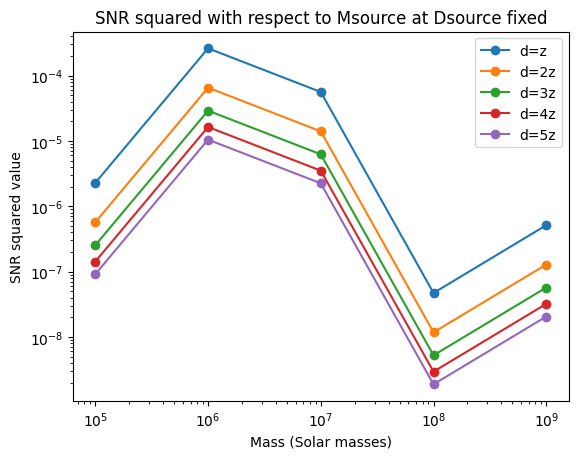

In [43]:
SNRc_X2_d = []
SNRc_X2_dtot = []
SNRc_X2_m = []
SNRc_X2_mtot = []

fmax=2e-2
fmin=3e-8
df=fmax-fmin

def SNR_carre(P_d,Sn_f):
    
    return 4*np.real(np.sum((P_d/(Sn_f))))*(1/Tobs)

for i in range(s):
    SNRc_X2_d.append(SNR_carre((np.abs(dt*np.fft.rfft(tab_X2gw_d[i][1:-6])))**2,PSD_sciRD_X2usb[i][1:-2]))
    
for i in range(p):
    SNRc_X2_dtot.append(SNRc_X2_d)
    SNRc_X2_dtot[i]=SNRc_X2_d[0+p*i:(i+1)*p]    
    
plt.figure()
plt.loglog(mass_BH,SNRc_X2_dtot[0], marker='o', label='d=z')
plt.loglog(mass_BH,SNRc_X2_dtot[1], marker='o', label='d=2z')
plt.loglog(mass_BH,SNRc_X2_dtot[2], marker='o', label='d=3z')
plt.loglog(mass_BH,SNRc_X2_dtot[3], marker='o', label='d=4z')
plt.loglog(mass_BH,SNRc_X2_dtot[4], marker='o', label='d=5z')
plt.title('SNR squared with respect to Msource at Dsource fixed')
plt.legend()
plt.ylabel('SNR squared value')
plt.xlabel('Mass (Solar masses)')

print(SNRc_X2_dtot)

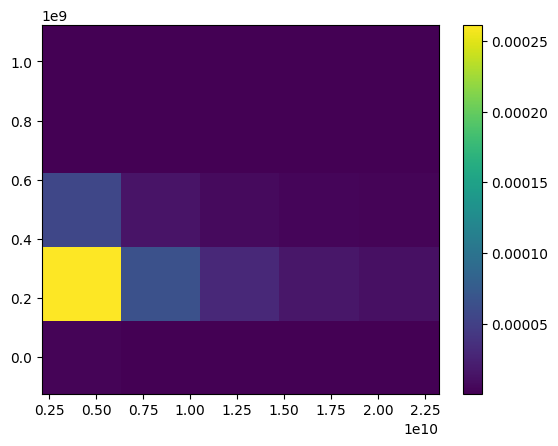

In [44]:
import matplotlib
grid=np.zeros((p,p))

VY = np.linspace(10**5,10**9,5)
VX = d_source
X,Y = np.meshgrid(VX, VY)


for i in range(p):
    for j in range(p):
        grid[i][j]=SNRc_X2_dtot[j][i]
        
        
fig, ax = plt.subplots()
plot = ax.pcolor(X, Y, grid,vmin=abs(grid).min(), vmax=abs(grid).max())
#cmap=matplotlib.cm.RdBu
cb = fig.colorbar(plot, ax=ax)



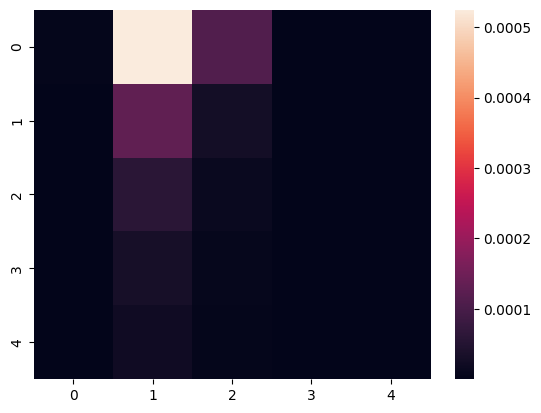

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


x = d_source
y = mass_BH


#sns.set()
uniform_data = SNRc_X2_dtot
ax = sns.heatmap(uniform_data, vmin=abs(grid).min(), vmax=abs(grid).max())
ax.plot(x,y)
plt.show()

# Plots

In [23]:
#Response

<Figure size 1500x1000 with 0 Axes>

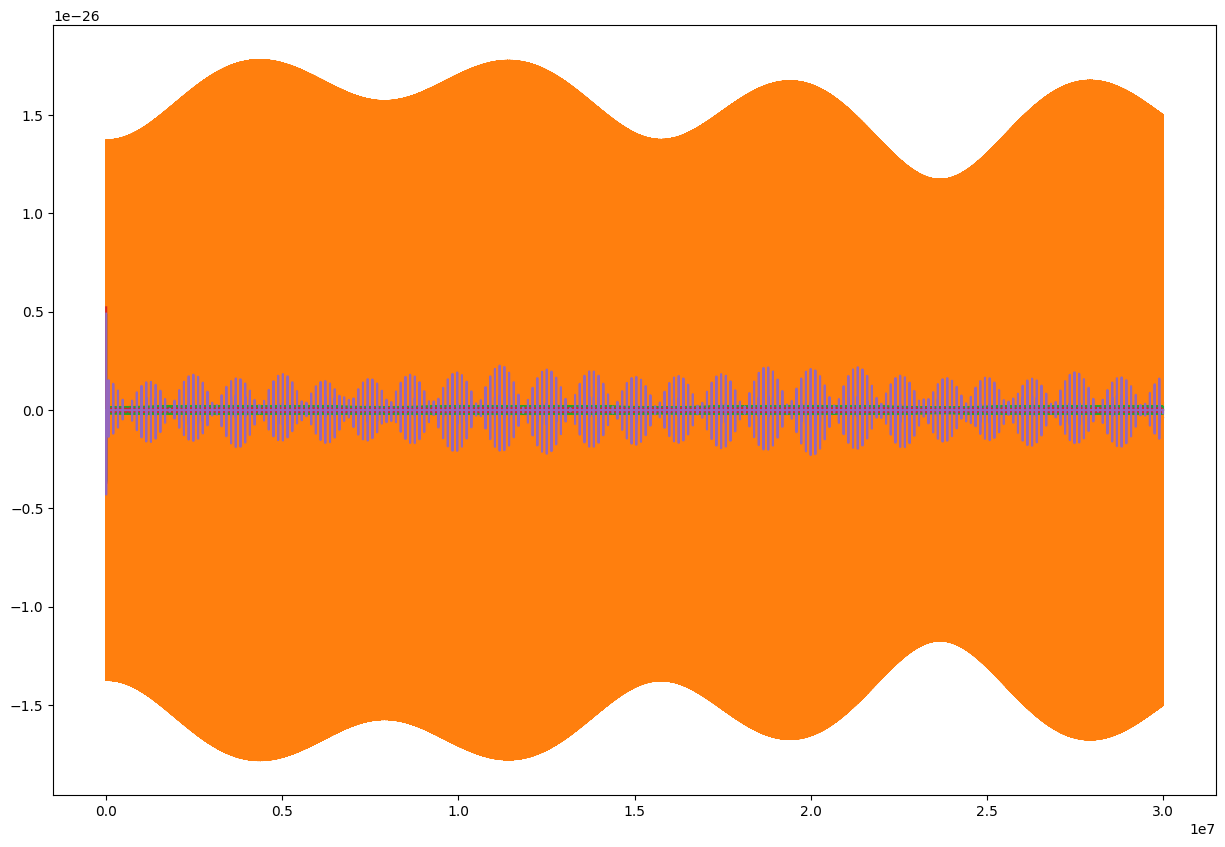

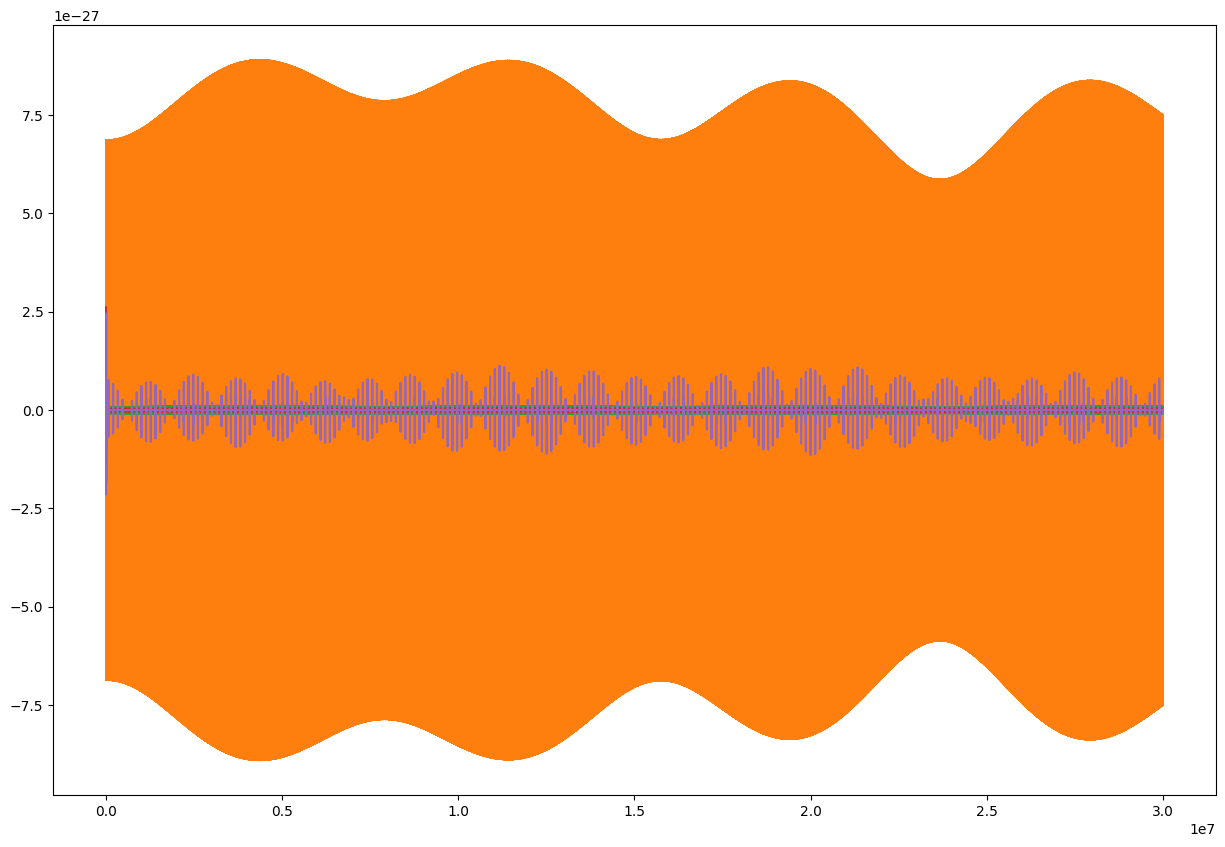

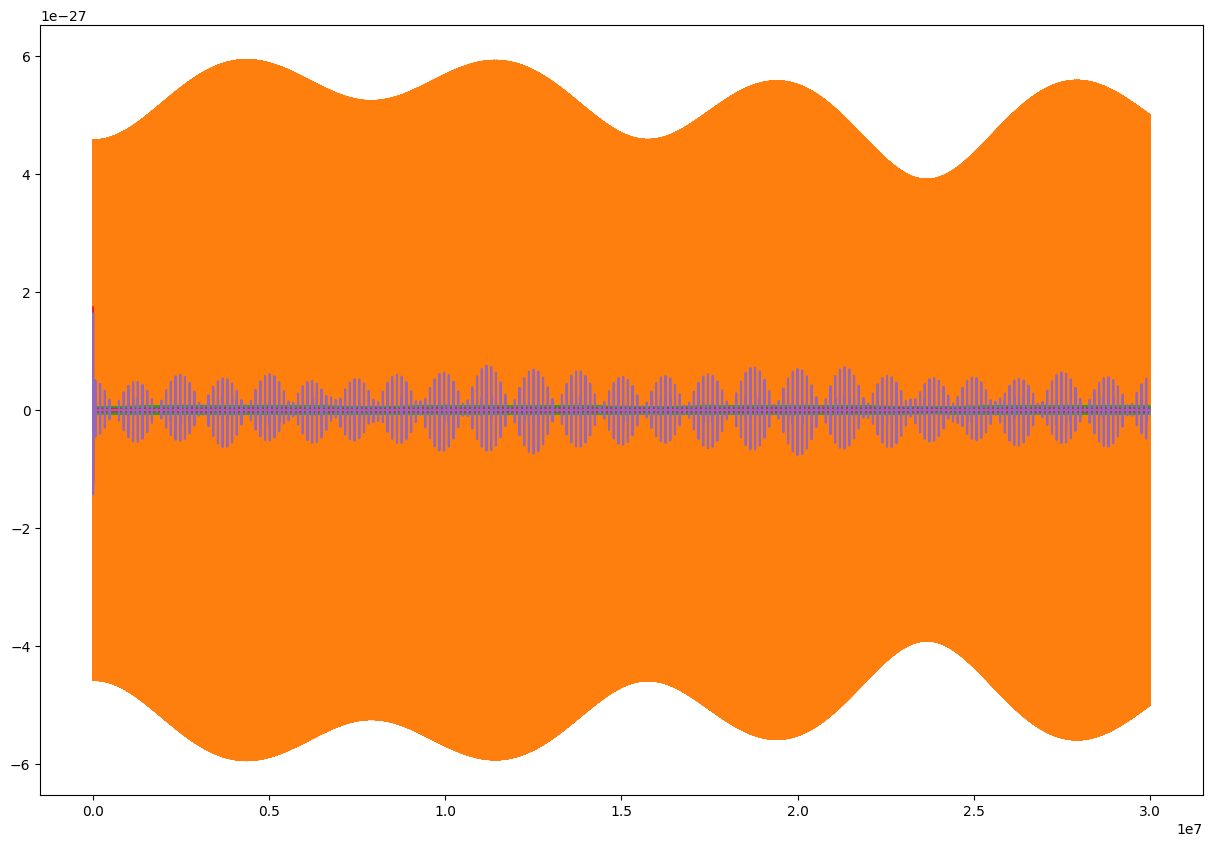

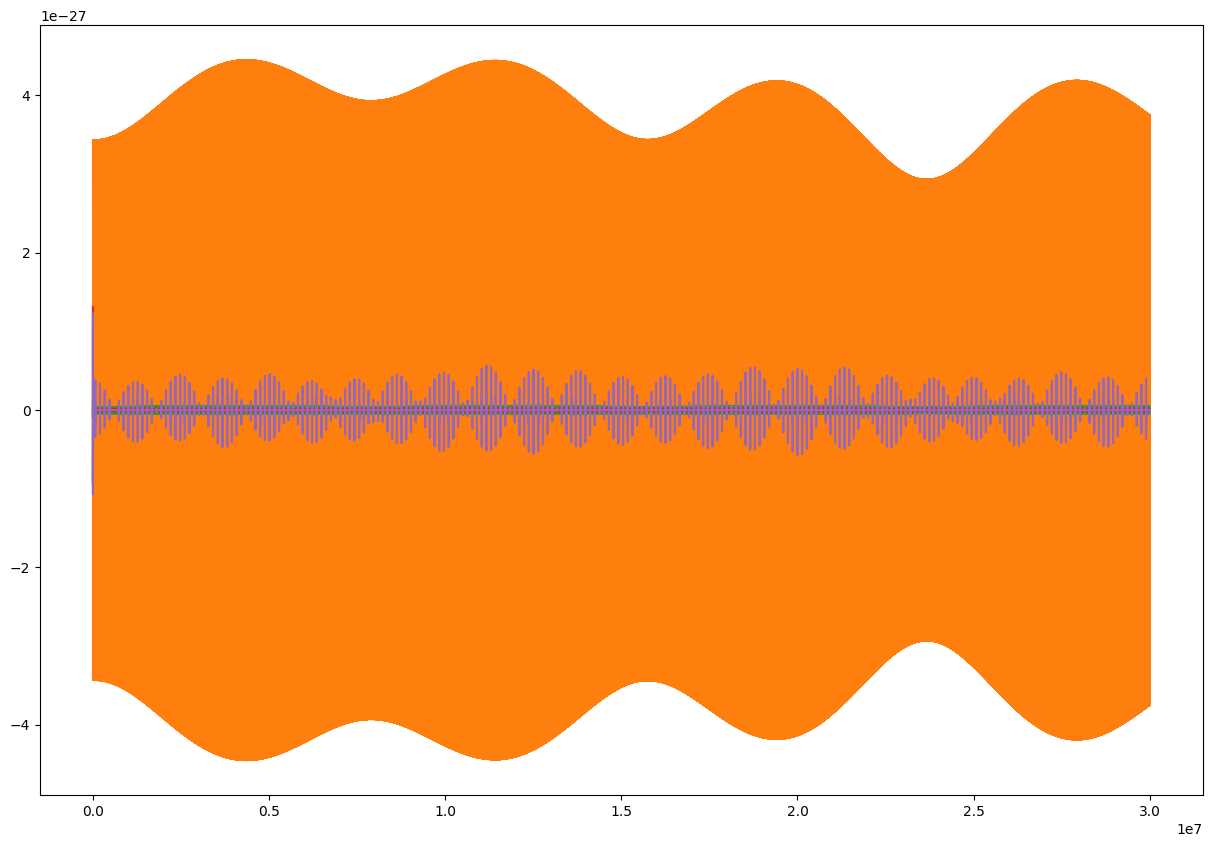

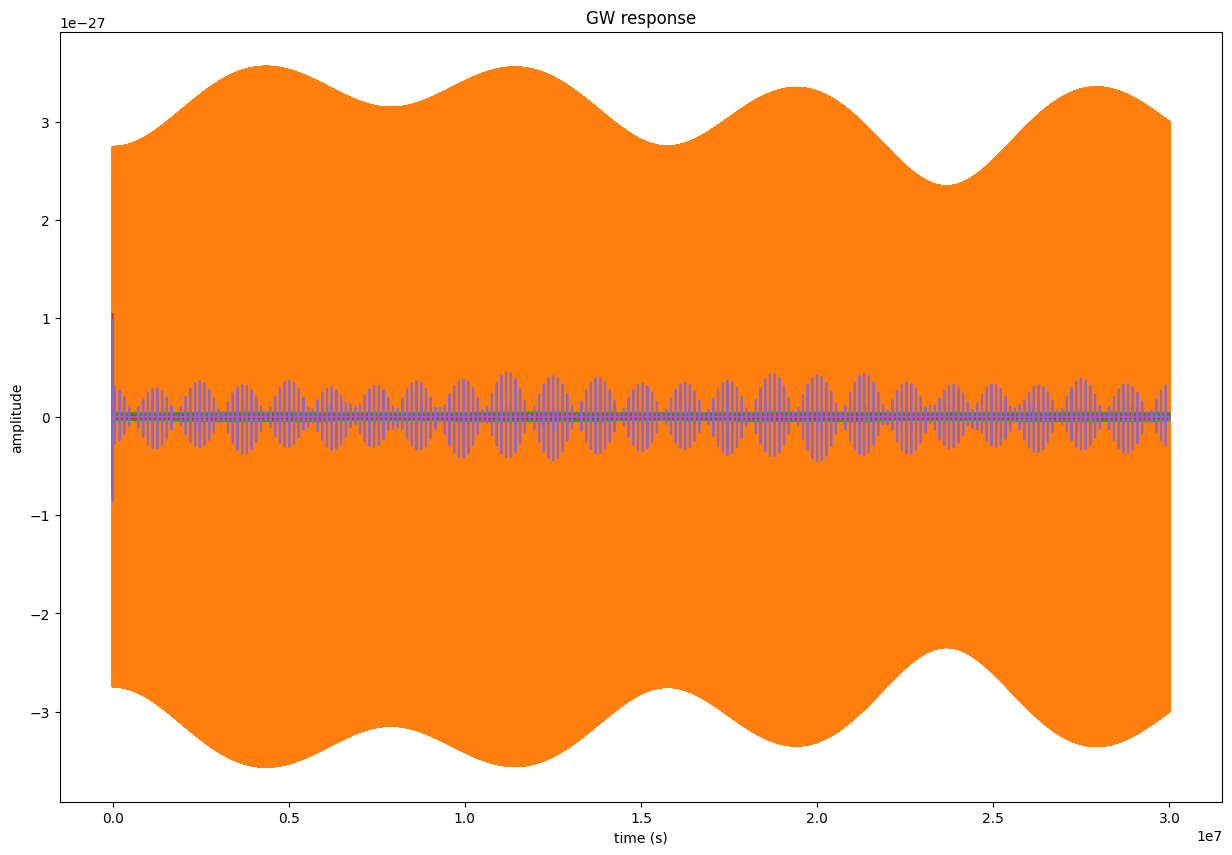

In [24]:

plt.figure(figsize=(15,10))

for d in range(p):
    plt.figure(figsize=(15,10))
    for b in range(p):
        #plt.plot(t[100000:-100000], tab_X2gw_dtot[d][b][100000:-100000])
        plt.plot(t[:-10], tab_X2gw_dtot[d][b][:-10])
    
plt.title('GW response')
plt.xlabel('time (s)')
plt.ylabel('amplitude')        
plt.show()
    

In [25]:
#PSD

Text(0.5, 0, 'Frequency (Hz)')

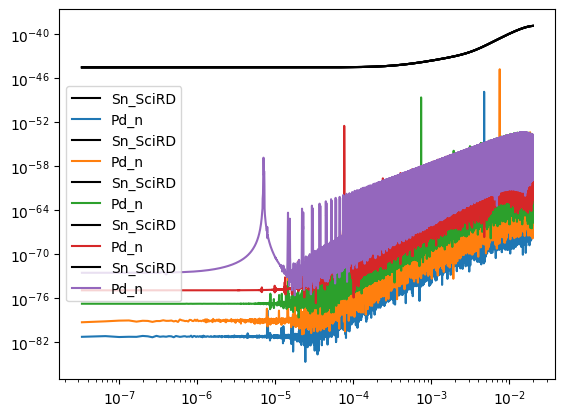

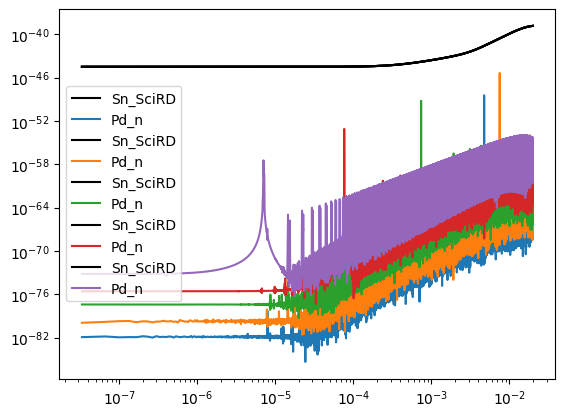

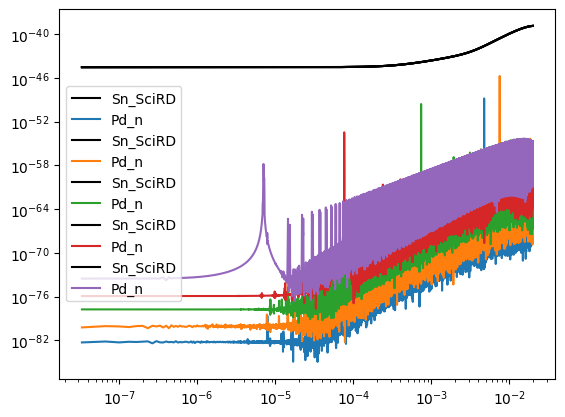

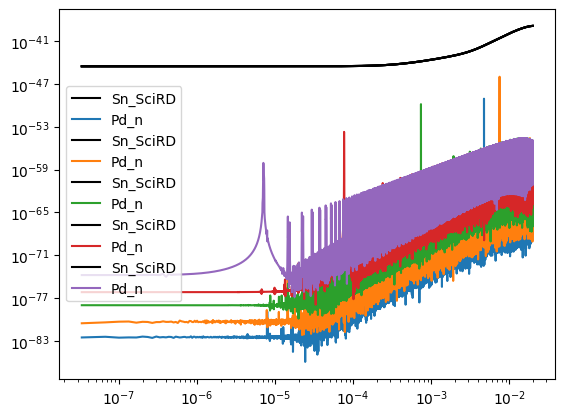

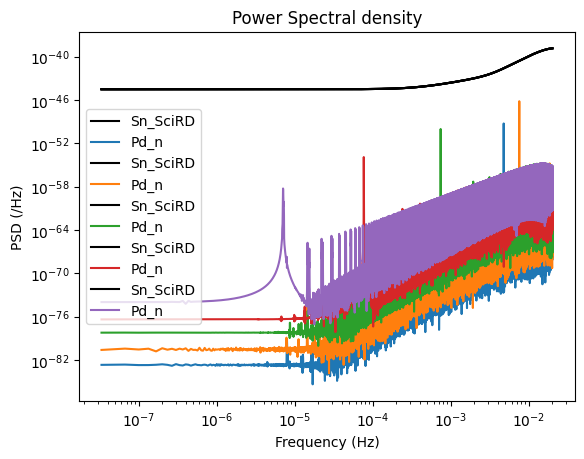

In [47]:
for d in range(p):
    plt.figure()

    for i,b in zip(range(p),range(p)):
        plt.loglog(f[1:-6],PSD_sciRD_X2usb[i][:-6], label='Sn_SciRD',c='black')
        #plt.loglog(f[1:-6],Sn_theo_tot[i],label='Sn_theo')
        plt.loglog(f[1:-6],Pd_X2n_dtot[d][b][1:],label='Pd_n')

    plt.legend()
    plt.xlim()
plt.title('Power Spectral density')
plt.ylabel('PSD (/Hz)')
plt.xlabel('Frequency (Hz)')

